In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
import psycopg2

In [3]:
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

In [4]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [5]:
#total missing values from dataframe 
life.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
#strip empty spaces from column names
life.columns = life.columns.str.strip()

**Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.**

In [7]:
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
#show the number of countries in the table
life["Country"].nunique()

193

In [9]:
#verify whether missing values in the Life expectancy column are only concentrated in certain countries 
life[life["Life expectancy"].isnull()].Country.value_counts()

Tuvalu                   1
Monaco                   1
Dominica                 1
San Marino               1
Nauru                    1
Niue                     1
Cook Islands             1
Saint Kitts and Nevis    1
Marshall Islands         1
Palau                    1
Name: Country, dtype: int64

In [10]:
null_lifeexpect_countries = ["Monaco", "Dominica", "Tuvalu","Nauru","Palau","Niue","San Marino","Saint Kitts and Nevis","Cook Islands","Marshall Islands"] 
#show total number of data entries assocaited with countries that have missing value in Life expectancy
for null_country in null_lifeexpect_countries:
    print(life[life['Country'] == null_country].Country.value_counts())

Monaco    1
Name: Country, dtype: int64
Dominica    1
Name: Country, dtype: int64
Tuvalu    1
Name: Country, dtype: int64
Nauru    1
Name: Country, dtype: int64
Palau    1
Name: Country, dtype: int64
Niue    1
Name: Country, dtype: int64
San Marino    1
Name: Country, dtype: int64
Saint Kitts and Nevis    1
Name: Country, dtype: int64
Cook Islands    1
Name: Country, dtype: int64
Marshall Islands    1
Name: Country, dtype: int64


In [11]:
#drop rows with missing values from Life expectancy. 
life = life.dropna(subset=['Life expectancy'])

In [12]:
#find the number of null values in the rest of the variables broken down by countries 
rest_null_col = ["Alcohol","Hepatitis B","BMI", "Polio", "Total expenditure", "Diphtheria", "GDP", "Population", "thinness  1-19 years", "thinness 5-9 years", "Income composition of resources","Schooling"]

for var in rest_null_col:
    print("------------------------------------------------")
    print("Total Number of Missing Values in Column: {} by Countries". format(var))
    print("------------------------------------------------")
    print(life[life[var].isnull()].Country.value_counts())

------------------------------------------------
Total Number of Missing Values in Column: Alcohol by Countries
------------------------------------------------
South Sudan                                  16
Montenegro                                    2
Liberia                                       1
Uzbekistan                                    1
Saint Vincent and the Grenadines              1
Mexico                                        1
Niger                                         1
Pakistan                                      1
The former Yugoslav republic of Macedonia     1
Nigeria                                       1
Saudi Arabia                                  1
United Republic of Tanzania                   1
Sao Tome and Principe                         1
Zambia                                        1
Chile                                         1
Greece                                        1
Slovakia                                      1
Poland                 

In [13]:
#fill a missing value for a variable with the mean of that variable from that country
countries = life["Country"].unique()

for col in rest_null_col:
    for country in countries:
        life.loc[life["Country"] == country, col].fillna(
        life[life["Country"] == country][col].mean(), inplace=True)
        
# drop the null values after we fill in empty spaces by the mean of the column from the country. 
life.dropna(inplace = True)

life.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

Interpolation is used when variables grow in a linear pattern over time. However, in this dataset, a lot of the variables (ex. Hepatitis B and Polio) don't grow in a linear pattern over time. Therefore, I abandoned using interpolation technique to deal with missing values. Instead, I filled in the missing values by the avgerage of that variable from that country.

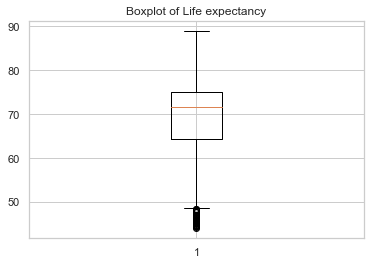

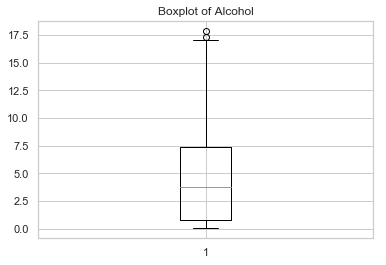

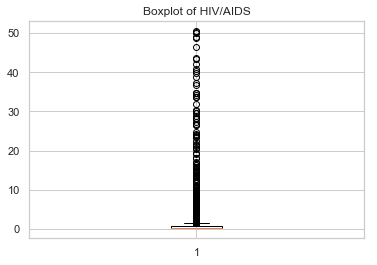

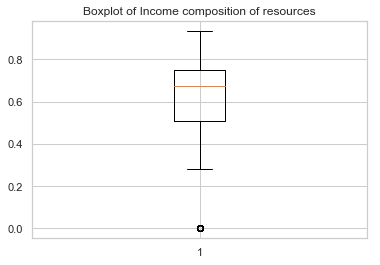

In [14]:
# Visually detecting the outliers
col_list = ['Life expectancy','Alcohol', "HIV/AIDS", "Income composition of resources"]

for col in col_list: 
    plt.boxplot(life[col],whis = 1.5)
    plt.title("Boxplot of " + col)
    plt.show()


In [15]:
#two way winsorization. 
# set the values of the highest end of the distribution to the value of the 90th percentile. Similarly, we can set the values of the lowest end to the value of the 10th percentile.
from scipy.stats.mstats import winsorize

for x in life.columns:
    life["win {}". format(x)]= winsorize(life[x], (0.1, 0.1))



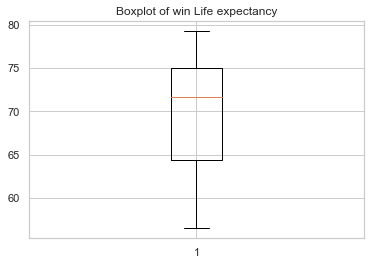

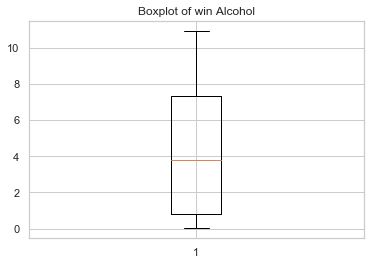

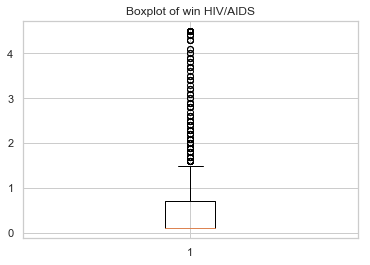

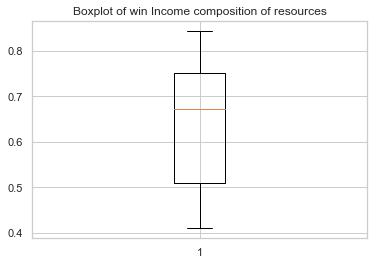

In [16]:
# show graphs after winsorization for selected variables
full_list = ['win Life expectancy','win Alcohol', "win HIV/AIDS", "win Income composition of resources"]

for col in full_list: 
    plt.boxplot(life[col],whis = 1.5)
    plt.title("Boxplot of " + col)
    plt.show()

The box plots reveal no outliers for variables ("Life expectancy", "Alcohol", and "Income Composition of Resources") after winsorization.

**Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.**

In [17]:
# get univariate statistics for the selected target variables 

univariate_stat_var = ["Life expectancy", "Alcohol", "HIV/AIDS", "Income composition of resources", "win Life expectancy", "win Alcohol", "win HIV/AIDS", "win Income composition of resources"]
life[univariate_stat_var].describe()

,Life expectancy,Alcohol,HIV/AIDS,Income composition of resources,win Life expectancy,win Alcohol,win HIV/AIDS,win Income composition of resources
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,69.302304,4.533196,1.983869,0.631551,69.508854,4.392426,0.855367,0.642769
std,8.796834,4.029189,6.032360,0.183089,7.317280,3.747208,1.422120,0.141664
min,44.000000,0.010000,0.100000,0.000000,56.500000,0.010000,0.100000,0.410000
25%,64.400000,0.810000,0.100000,0.509000,64.400000,0.810000,0.100000,0.509000
50%,71.700000,3.790000,0.100000,0.673000,71.700000,3.790000,0.100000,0.673000
75%,75.000000,7.340000,0.700000,0.751000,75.000000,7.340000,0.700000,0.751000
max,89.000000,17.870000,50.600000,0.936000,79.300000,10.930000,4.500000,0.844000


On one hand, the mean for original life expectancy is not significantly different from the mean for winsorized one. A similar observation can be made for other variables' means before and after winsorization. On the other hand, standard deviations for all winsorized variables are more noticeablely different from original variables. It means that by limiting extreme values, winsorization helps to curve down the spread of the data measured by SD.

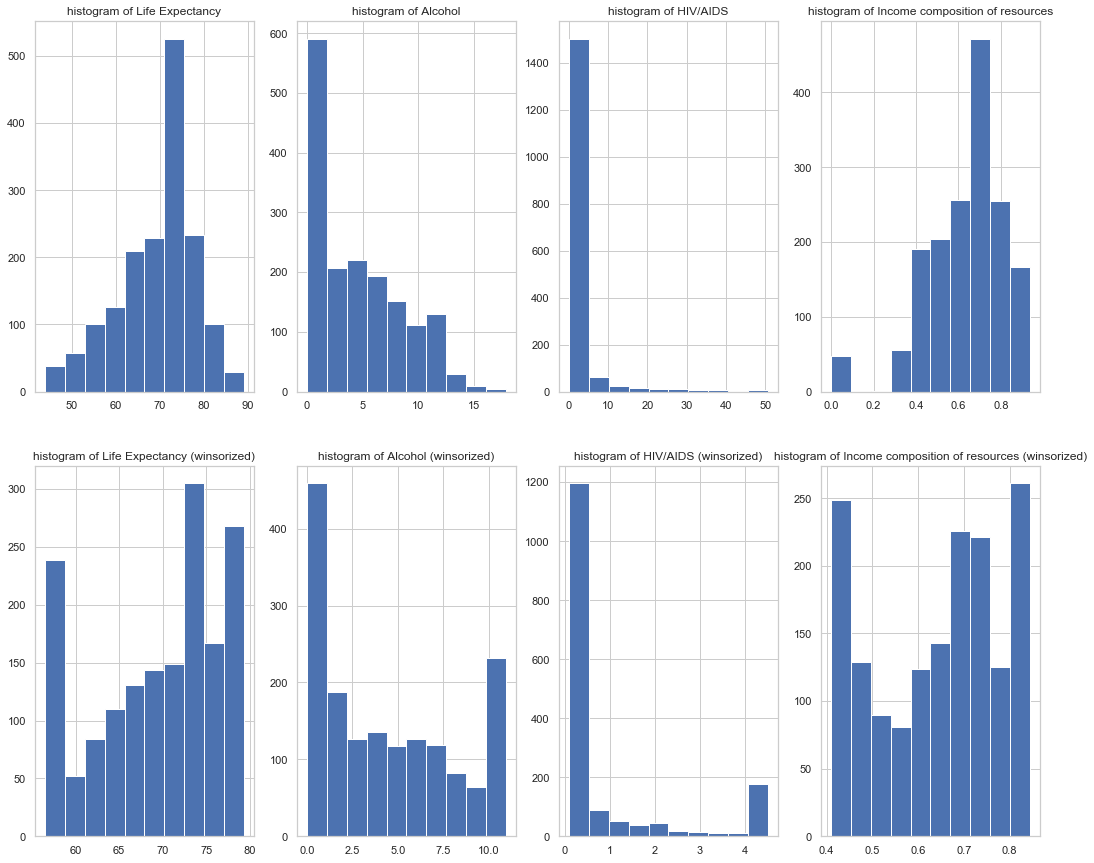

In [18]:
#univariate visualization 
plt.figure(figsize=(18,15))

# histograms of the original data
plt.subplot(2, 4, 1)
plt.hist(life["Life expectancy"])
plt.title("histogram of Life Expectancy")

plt.subplot(2, 4, 2)
plt.hist(life["Alcohol"])
plt.title("histogram of Alcohol")

plt.subplot(2, 4, 3)
plt.hist(life["HIV/AIDS"])
plt.title("histogram of HIV/AIDS")

plt.subplot(2, 4, 4)
plt.hist(life["Income composition of resources"])
plt.title("histogram of Income composition of resources")

# histograms of the winsorized data
plt.subplot(2, 4, 5)
plt.hist(life["win Life expectancy"])
plt.title("histogram of Life Expectancy (winsorized)")

plt.subplot(2, 4, 6)
plt.hist(life["win Alcohol"])
plt.title("histogram of Alcohol (winsorized)")

plt.subplot(2, 4, 7)
plt.hist(life["win HIV/AIDS"])
plt.title("histogram of HIV/AIDS (winsorized)")

plt.subplot(2, 4, 8)
plt.hist(life["win Income composition of resources"])
plt.title("histogram of Income composition of resources (winsorized)")


plt.show()

The histograms of the original and winsorized variables demonstrate highly skewed distributions. 

Text(0.5, 1.0, 'average life expectancy per nationa status')

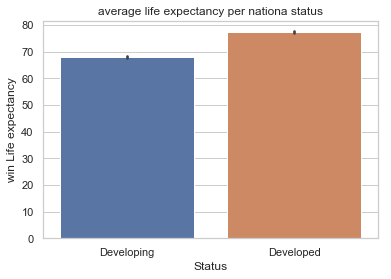

In [19]:
# Bivariate analysis (bar plot) of a continuous-categorical pair ("Status" vs. "Life expectancy")
sns.barplot(life['Status'], life["win Life expectancy"])
plt.title("average life expectancy per nationa status")


Developed countries tended to have higher life expectancy on avg than developing countries.

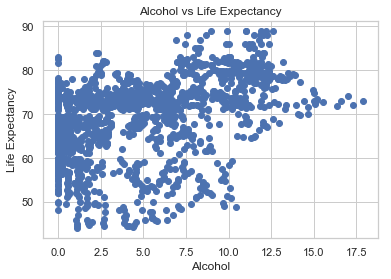

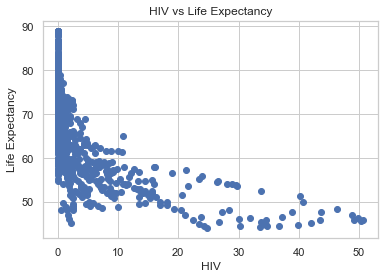

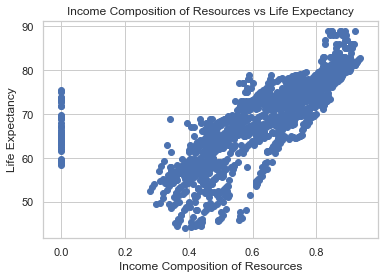

In [20]:
# Bivariate analysis (scatter plot) of two continuous variables ("Alcohol" vs. "Life expectancy")


plt.scatter(life["Alcohol"], life["Life expectancy"])
plt.title("Alcohol vs Life Expectancy")
plt.xlabel("Alcohol")
plt.ylabel("Life Expectancy")
plt.show()

plt.scatter(life["HIV/AIDS"], life["Life expectancy"])
plt.title("HIV vs Life Expectancy")
plt.xlabel("HIV")
plt.ylabel("Life Expectancy")
plt.show()

plt.scatter(life["Income composition of resources"], life["Life expectancy"])
plt.title("Income Composition of Resources vs Life Expectancy")
plt.xlabel("Income Composition of Resources")
plt.ylabel("Life Expectancy")
plt.show()

From the scatter plots, we can see that alcohol and income composition of resorces have a positive relationship (correlation) with life expectancy variable. As income composition of resources increases, life expectancy increases. As life expectancy increases, alcohol consumption increases. It is important to note that the increase of alcohol consumption might not be the direct cause for the increase in life expectancy. Alcohol consumption is an indicator of a nation's wealth and resource that plays an important role on people's health and life expectancy. On the other hand, HIV has a negative (correlation) relationship with life expectancy variable. Life expectancy drops ss more people suffer and die from HIV. 

**In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.**

In [28]:
win_life_corrmap = life.loc[:,"win Adult Mortality":"win Schooling"].corr()
life_corrmap =life.loc[:,"Adult Mortality":"Schooling"].corr()

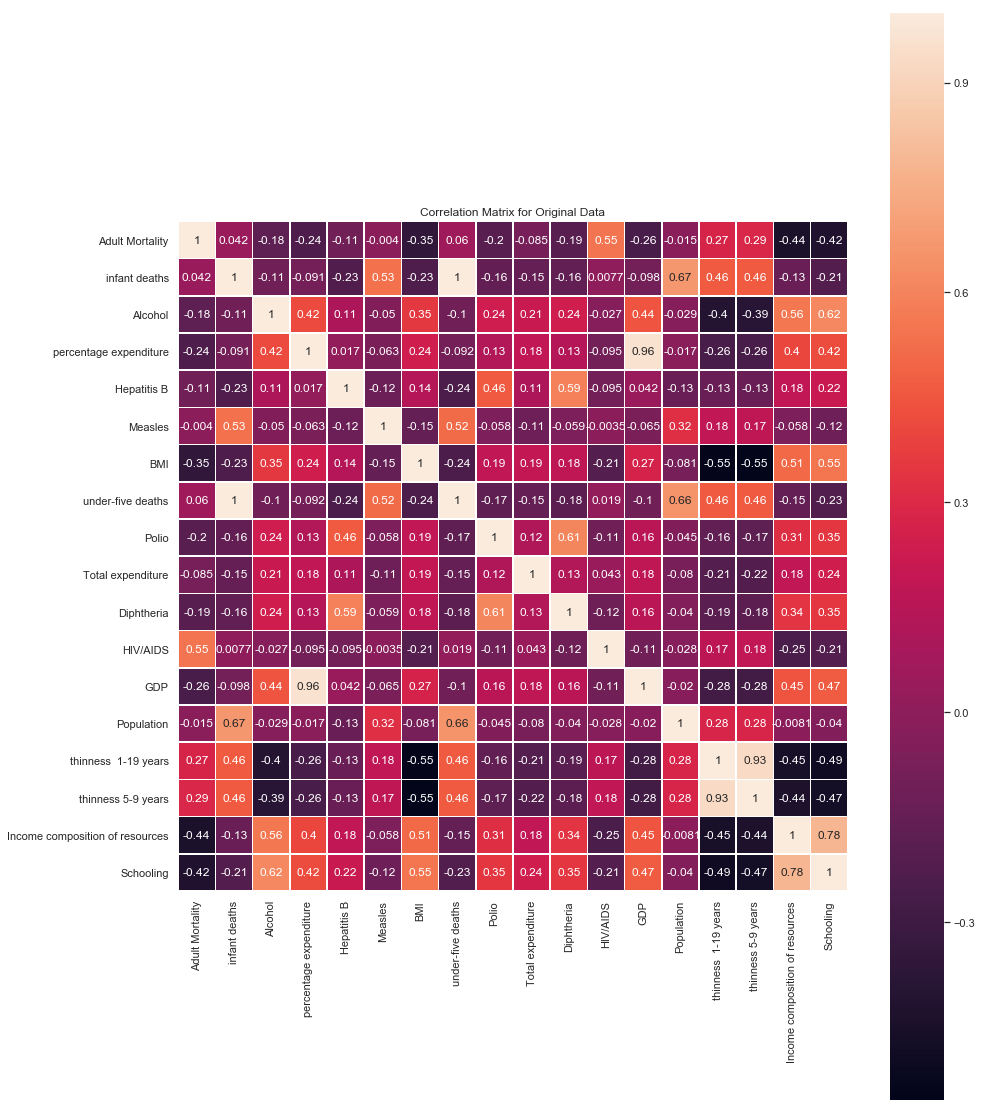

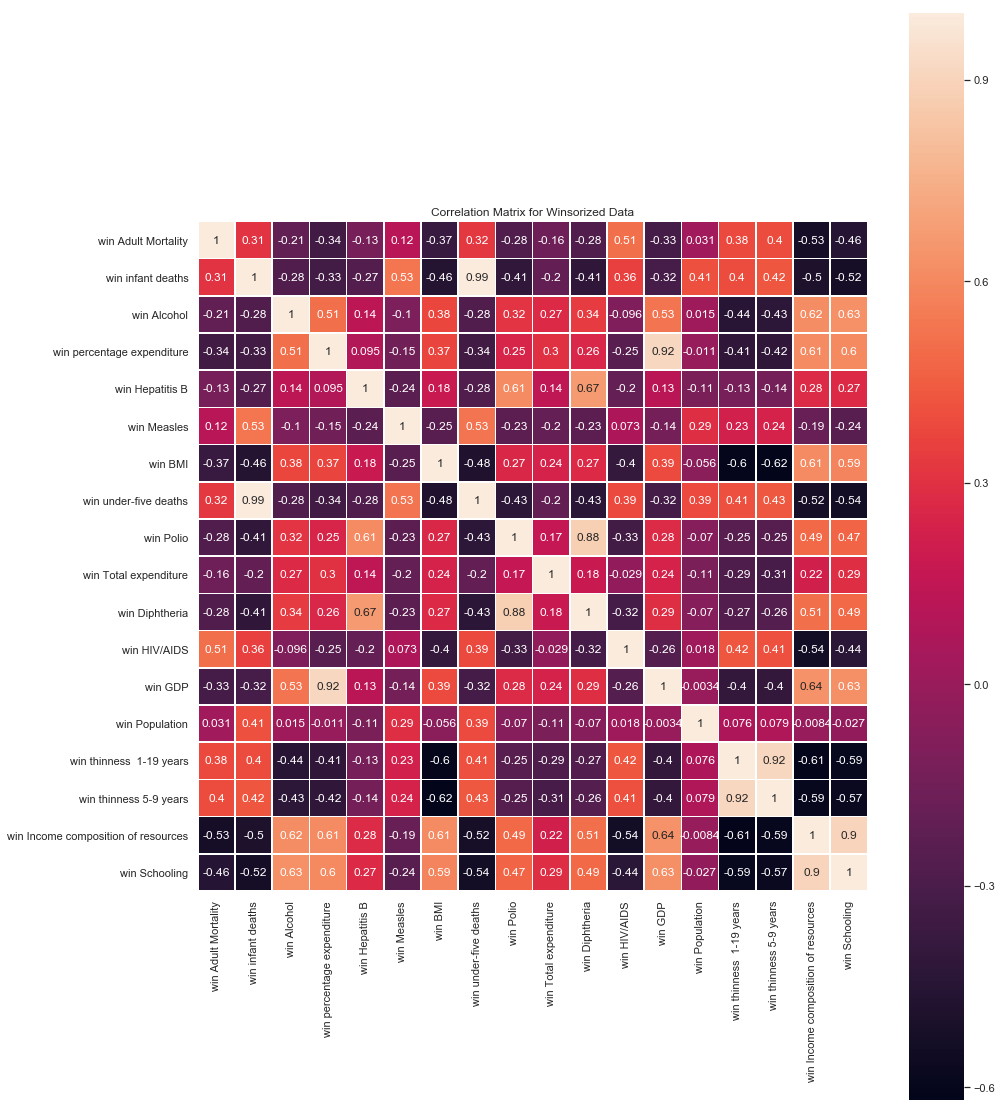

In [29]:
plt.figure(figsize  = (15,20))
sns.heatmap(life_corrmap, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix for Original Data")
plt.show()

plt.figure(figsize  = (15,20))
sns.heatmap(win_life_corrmap, square=True, annot=True, linewidths=.5)
plt.title("Correlation Matrix for Winsorized Data")
plt.show()

The variable "Infant Deaths" and variable "under-five deaths" are having a correlation of 1, which means their variances are highly similar. We can drop one of the two variables. Additionally, the variable "Percentage expenditure" is highly corrlated with "GDP". We can also drop one of the two variables. 

Conclusion: Based on the analysis, a nation's economic standing plays an important role in people's life expectancy. 